# Blended Learning EDA

This notebook is taking a look through which blended learning programs are used most frequently, how long sessions last and whether particular schools are using blended learning programs more than other school.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import os

conn = pyodbc.connect(r'DSN=' + os.getenv("DSN_SZ") + ';UID=' + os.getenv("SZ_USERNAME") + ";PWD=" + os.getenv("SZ_PWD"))

lexia_df = pd.read_sql_query("select * from custom.custom_Lexia", con=conn)

In [2]:
def cast_to_num(df, column):
    return df[column].astype('float64')
   
cols_to_convert_to_num = ['duration_minutes', 'units_to_target', 'today_mins', 'today_units', 'week_time', 'weekly_target', 'meeting_target_usage']
cols_to_convert_to_dt = ["activity_start_time", "activity_end_time", "activity_timestamp"]

for col in cols_to_convert_to_num:
    cast_to_num(lexia_df, col)

In [3]:
# change data types
def accuracy_scores(row):
    if row['accuracy'] == 'High':
        return 3
    elif row['accuracy'] == "Medium":
        return 2
    elif row['accuracy'] == "Low":
        return 1
    else:
        return 0

lexia_df['accuracy_score'] = lexia_df.apply(lambda row: accuracy_scores(row),axis=1)

(array([  3.18480000e+04,   3.29400000e+03,   7.58500000e+03,
          4.05200000e+03,   6.07000000e+02,   1.45000000e+02,
          5.70000000e+01,   8.00000000e+00,   0.00000000e+00,
          4.00000000e+00]),
 array([  0. ,   7.5,  15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,
         67.5,  75. ]),
 <a list of 10 Patch objects>)

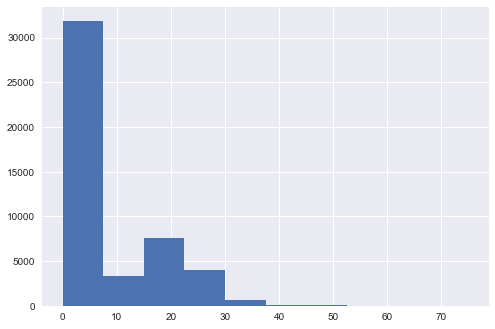

In [4]:
def cast_to_int(df, column):
    df[column] = df[column].astype('int32')

cast_to_int(lexia_df, 'today_mins')

plt.hist(lexia_df['today_mins'])